In [23]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
import imagetools as im
from kernel import *
from func_lib import *
from convolution import *
%matplotlib notebook

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
x = plt.imread('train.png')
y = plt.imread('race.png')

## 1 Seperable convolution

$\textbf{3.}$ 

<IPython.core.display.Javascript object>


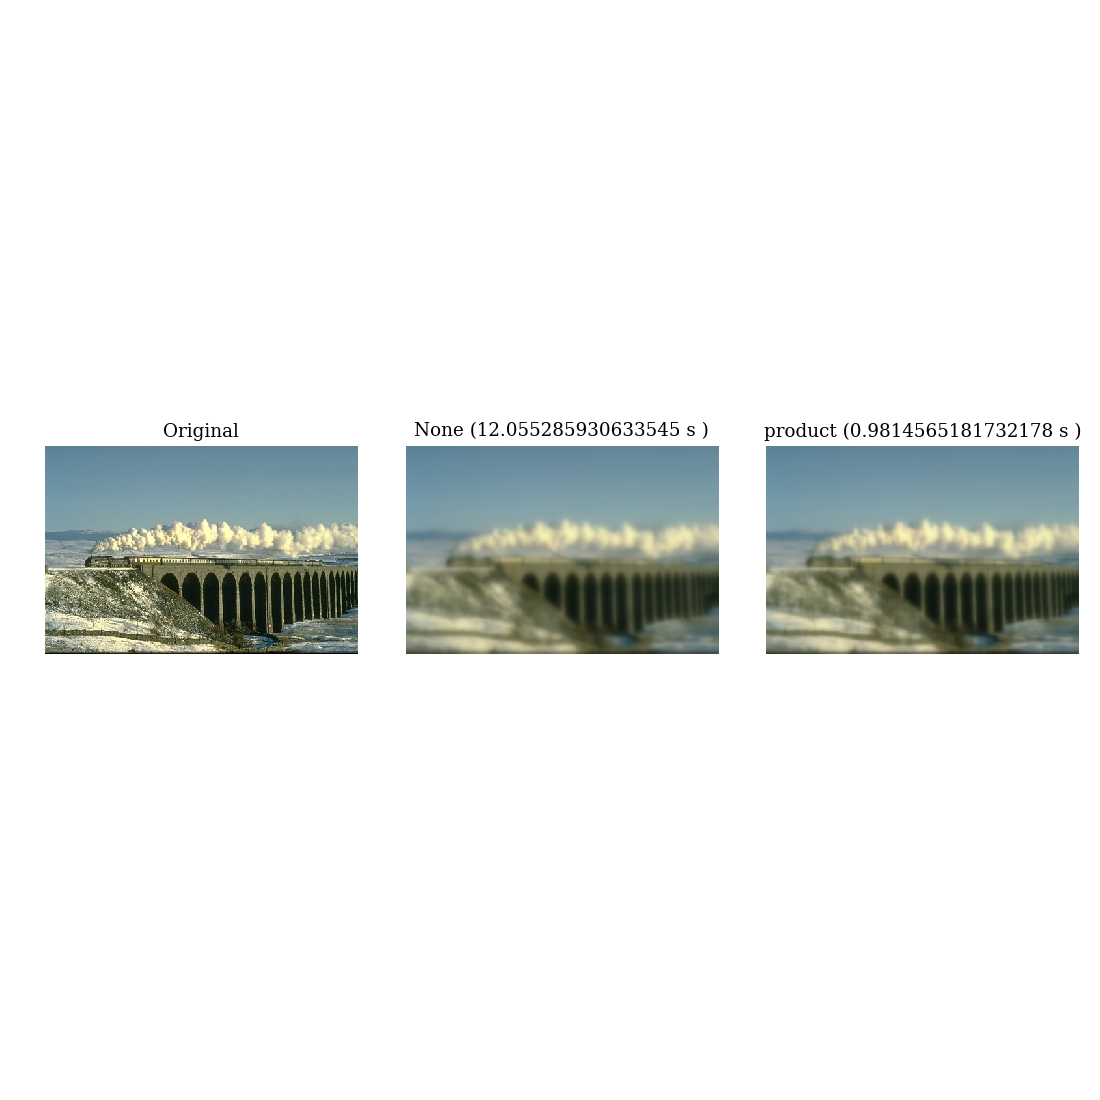

In [25]:
cnt = 1
f = plt.figure(figsize=(10,10))
ax = plt.subplot(1,3,cnt)
cnt += 1
ax.set_title("Original")
im.show(x)
s = [None,'product']
tau = 4
nu1 = kernel('exponential1', tau)
nu2 = kernel('exponential2', tau)
nu = kernel('exponential',tau)
for i in range(len(s)):
    #update nu
    if i != 0:
        nu = (nu1,nu2)
    start_time = time.time()
    x_conv = convolve_sep(x, nu, boundary='mirror', separable = s[i])
    elapsed_time = time.time() - start_time
    ax = plt.subplot(1,3,cnt)
    ax.set_title(str(s[i]) + " (" + str(elapsed_time) + " s )")
    im.show(x_conv)
    cnt += 1

## 2. Derivative filters

$\textbf{5.}$ 

/home/shoachia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "
/home/shoachia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


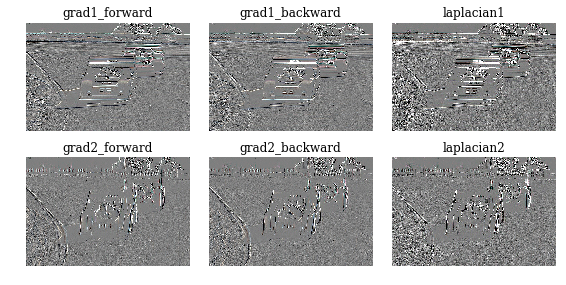

In [8]:
s = ['grad1_forward','grad2_forward','grad1_backward','grad2_backward','laplacian1','laplacian2']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 4),
sharex='all', sharey='all')
for i in range(len(s)):
    nu = kernel(s[i])
    res = convolve_sep(y, nu, boundary='periodical', separable = None)
    im.show(res,vmin = -0.2, vmax = 0.2, ax = axes[i % 2][int(i / 2)])
    axes[i % 2][int(i / 2)].set_title(s[i])
fig.show()

$\textbf{6.}$ 

$\textbf{1. Forward:}$ 

$x_1' = x_2 - x_1$

$x_2' = x_3 - x_2$

$x_3' = x_4 - x_3$

$x_4' = x_1 - x_4$

$
\begin{bmatrix}
x_1'\\x_2'\\x_3'\\x_4
\end{bmatrix} = 
\begin{bmatrix} 
-1 & 1 &  &\\
   &-1 &1&   \\
   &   & -1& 1 \\
 1 &   &  & -1   
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
$

$\textbf{2. Backward:}$

$x_1' = x_1 - x_4$

$x_2' = x_2 - x_1$

$x_3' = x_3 - x_2$

$x_4' = x_4 - x_1$

$
\begin{bmatrix}
x_1'\\x_2'\\x_3'\\x_4
\end{bmatrix} = 
\begin{bmatrix} 
 1 &   &  & -1\\
 -1& 1 & &   \\
   & -1 & 1&  \\
  &   & -1 & 1   
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
$

$\therefore (\nabla ^{forward}_1)^T = -\nabla^{backward}_1$ 

$\textbf{7.}$ 

In [9]:
b = ['periodical','extension','zero-padding','mirror']
for i in range(len(b)):
    first = np.sum(np.multiply(x,convolve_sep(y,kernel('grad1_backward'), boundary = b[i], separable = None)))
    second = -np.sum(np.multiply(convolve_sep(x, kernel('grad1_forward'), boundary = b[i], separable = None),y))
    print(b[i] + "  :  " + str(np.isclose(first,second)))

periodical  :  True
extension  :  False
zero-padding  :  True
mirror  :  False


#### Conclusion:
Periodical boundary condition is prove in 6.

Below is for zero-padding boundary condition

$\textbf{1. Forward:}$ 

$x_1' = x_2 - x_1$

$x_2' = x_3 - x_2$

$x_3' = x_4 - x_3$

$x_4' =  - x_4$

$
\begin{bmatrix}
x_1'\\x_2'\\x_3'\\x_4
\end{bmatrix} = 
\begin{bmatrix} 
-1 & 1 &  &\\
   &-1 &1&   \\
   &   & -1& 1 \\
  &   &  & -1   
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
$

$\textbf{2. Backward:}$

$x_1' = x_1 $

$x_2' = x_2 - x_1$

$x_3' = x_3 - x_2$

$x_4' = x_4 - x_1$

$
\begin{bmatrix}
x_1'\\x_2'\\x_3'\\x_4
\end{bmatrix} = 
\begin{bmatrix} 
 1 &   &  & \\
 -1& 1 & &   \\
   & -1 & 1&  \\
  &   & -1 & 1   
\end{bmatrix}
\begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix}
$

$\textbf{8.}$ 

$x = \begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix} \quad y =  \begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix}$

$\langle x,\nabla^{backward}_1 y \rangle$ 

$ = \langle \begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix},\begin{bmatrix} 
 1 &   &  & -1\\
 -1& 1 & &   \\
   & -1 & 1&  \\
  &   & -1 & 1   
\end{bmatrix}
\begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix} \rangle =
\langle \begin{bmatrix}
x_1\\x_2\\x_3\\x_4
\end{bmatrix},\begin{bmatrix}
y_1 - y_4\\y_2 - y_1\\y_3 - y_2\\y_4 - y_3
\end{bmatrix} \rangle
$
$
= x_1y_1 - x_1y_4 + x_2y_2-x_2y_1+x_3y_3-x_3y_2 + x_4y_4-x_4y_3
$

$=\langle \begin{bmatrix}
x_2-x_1\\x_3-x_2\\x_4 - x_3\\x_1 - x_4
\end{bmatrix},\begin{bmatrix}
y_1 \\y_2 \\y_3 \\y_4
\end{bmatrix} \rangle$

$= -\langle \nabla^{forward}_1 x,y \rangle$


$\textbf{9.}$ 

In [10]:
for i in range(len(b)):
    first = convolve_sep(y,kernel('grad1_forward'), boundary = b[i], separable = None)
    first = convolve_sep(first,kernel('grad1_backward'), boundary = b[i], separable = None)
    second = convolve_sep(y,kernel('laplacian1'), boundary = b[i], separable = None)kp
    print(b[i] + "  :  " + str(np.allclose(first,second)))

periodical  :  True
extension  :  False
zero-padding  :  False
mirror  :  False


#### Conclusion:

Laplacian kernel in the first direction is the convolution of the grad1_forward kernel and grad1_backward.
Besides, only the periodical boundary can hold this equation. In the other boundary conditions, we have lost some information after doing grad1_forward. Therefore, when doing the grad1_backward we are not using the all the image information which is different from Laplacian. 

$\textbf{10.}$ 

$y =  \begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix}$

$
\nabla^{backward}_1 \nabla^{forward}_1 y
$

$
 = \begin{bmatrix} 
 1 &   &  & -1\\
 -1& 1 & &   \\
   & -1 & 1&  \\
  &   & -1 & 1   
\end{bmatrix}
\begin{bmatrix} 
-1 & 1 &  &\\
   &-1 &1&   \\
   &   & -1& 1 \\
 1 &   &  & -1   
\end{bmatrix}
\begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix} = \begin{bmatrix} 
-2 & 1 &  &1\\
 1  &-2 &1&   \\
   &  1 & -2& 1 \\
 1 &   & 1 & -2   
\end{bmatrix}\begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix}
$

$
\Delta_1 y 
= \begin{bmatrix} 
-2 & 1 &  &1\\
 1  &-2 &1&   \\
   &  1 & -2& 1 \\
 1 &   & 1 & -2   
\end{bmatrix}\begin{bmatrix}
y_1\\y_2\\y_3\\y_4
\end{bmatrix}
$

$\therefore \nabla^{backward}_1 \nabla^{forward}_1 = \Delta_1 y $

$\textbf{11.}$ 

In [11]:
def laplacian(x, boundary = 'periodical'):
    #Using separable == 'sum'
    nu1 = kernel('laplacian1')
    nu2 = kernel('laplacian2')
    nu = (nu1,nu2)
    xconv = convolve_sep(x, nu, boundary='periodical', separable='sum')
    return xconv

/home/shoachia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


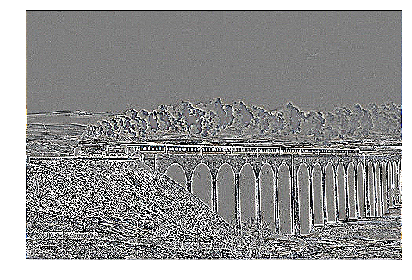

In [12]:
plt.figure()
im.show(laplacian(x),vmin = -0.2, vmax = 0.2)

$\textbf{12.}$ 

In [13]:
def grad(x, boundary='periodical'):
    g = np.stack((convolve_sep(x,kernel('grad1_forward'),boundary),convolve_sep(x,kernel('grad2_forward'),boundary)),axis = 2)
    return g

### TEST

In [14]:
gg = grad(x)

/home/shoachia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


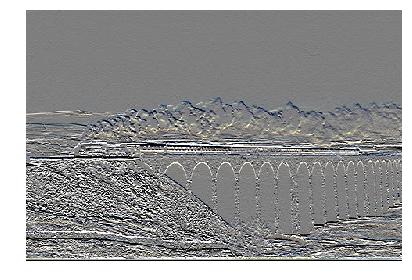

In [15]:
plt.figure()
im.show(gg[:,:,0],vmin = -0.2, vmax = 0.2)

$\textbf{13.}$ 

In [16]:
def div(f, boundary='periodical'):
    # f is a nxnx2x3 array for RGB image
    # grad1_forward will get the wrong answer
    d = convolve_sep(f[:,:,0],kernel('grad1_backward')) + convolve_sep(f[:,:,1],kernel('grad2_backward'))
    return d

### TEST

/home/shoachia/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:2299: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


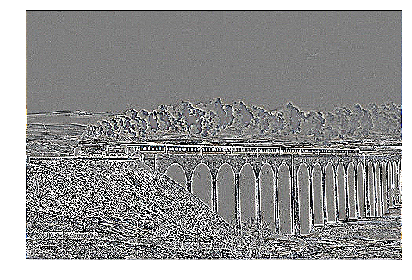

In [17]:
dd = div(gg)
plt.figure()
im.show(dd,vmin = -0.2, vmax = 0.2)

$\textbf{14.}$ 

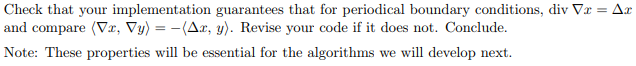

In [18]:
left = div(grad(x))
right = laplacian(x)
np.allclose(left,right)

True

In [19]:
left = np.sum(np.multiply(grad(x),grad(y)))
right = -np.sum(np.multiply(laplacian(x),y))
np.isclose(left,right)

True

#### Conclusion:

Periodical boundary conditoin guarantees the above 2 equations to be true